# Multi-Class Classification
Exploration of multi-class classifiaction through the classic MNIST dataset.

## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized). 

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

In [1]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Load the dataset
`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:
* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`

Notice that `mnist.load_data()` returned four separate values:

* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

**Note:** The MNIST .csv training set is already shuffled.


In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
x_train[2132]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 163, 144,  39,  24,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 239, 254, 254, 186,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 149, 250, 254, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 207, 244,  67

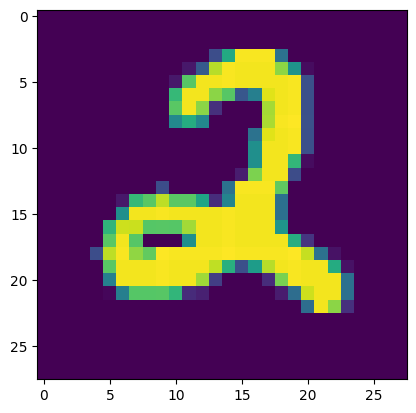

In [4]:
plt.imshow(x_train[213])

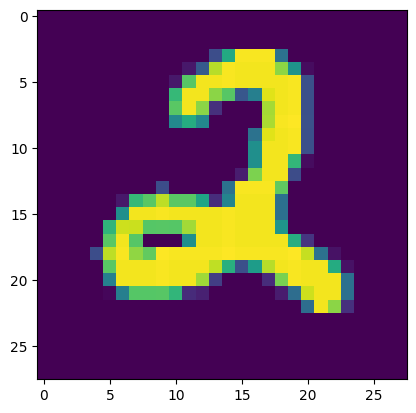

In [18]:
# Feature values normalization:
x_train_normalized = x_train / x_train.std()
x_test_normalized = x_test / x_train.std()
plt.imshow(x_train_normalized[213])

In [19]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a deep neural net model
The `create_model` function defines the topography of the deep neural net, specifying the following:
* The number of layers in the deep neural net.
* The number of nodes in each layer.
* Any refularization layers.

The `create_model` function also defines the activation function of each layer. The activation function of the output layer is softmax, which will yield 10 different outputs for each example.
Each of the 10 outputs provides the probability that the input example is a certain digit.

**Note**: This exercise does not define feature columns or a feature layer: we will train the model on a NumPy array.

In [31]:
def create_model(my_learning_rate):
    """
    Create and compile a deep neural net.
    """
    model = tf.keras.models.Sequential()
    
    # Features are stored in a two dimensional 28 x 28 array.
    # Fltten that two dimensional array into a one-dimensional 784-element array.
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    # First hidden layer.
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    
    # First hidden layer.
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    
    # Define a dropout regularization layer.
    model.add(tf.keras.layers.Dropout(rate=0.2))
    
    # Define the output layer. units is 10 because the model must choose between the digits 0 to 9, inclusive.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    # Compile: loss is sparse_categorical_crossentropy
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])
    return model

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    """
    Train the model by feeding it the data.
    """
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs= epochs, shuffle=True, validation_split=validation_split)
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

In [ ]:
## Hyperparameters:
learning_rate = 0.003
epochs = 500
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_test_normalized, y_train, epochs, batch_size, validation_split)

list_of_metrics_to_plot = ["accuracy"]
plot_curve(epochs, hist, list_of_metrics_to_plot)

Epoch 1/500
2/2 [==============================] - 1s 201ms/step - loss: 3.2412 - accuracy: 0.0981 - val_loss: 3.2557 - val_accuracy: 0.1040
Epoch 2/500
2/2 [==============================] - 0s 71ms/step - loss: 3.0032 - accuracy: 0.0976 - val_loss: 2.4348 - val_accuracy: 0.1010
Epoch 3/500
2/2 [==============================] - 0s 79ms/step - loss: 2.4186 - accuracy: 0.1026 - val_loss: 2.3471 - val_accuracy: 0.1110
Epoch 4/500
2/2 [==============================] - 0s 76ms/step - loss: 2.3454 - accuracy: 0.1116 - val_loss: 2.3211 - val_accuracy: 0.1085
Epoch 5/500
2/2 [==============================] - 0s 79ms/step - loss: 2.3220 - accuracy: 0.1005 - val_loss: 2.3193 - val_accuracy: 0.0950
Epoch 6/500
2/2 [==============================] - 0s 97ms/step - loss: 2.3108 - accuracy: 0.1071 - val_loss: 2.3110 - val_accuracy: 0.0940
Epoch 7/500
2/2 [==============================] - 0s 69ms/step - loss: 2.3020 - accuracy: 0.1100 - val_loss: 2.3035 - val_accuracy: 0.0900
Epoch 8/500
2/2 [==

2/2 [==============================] - 0s 87ms/step - loss: 2.0437 - accuracy: 0.2604 - val_loss: 2.4698 - val_accuracy: 0.1015
Epoch 60/500
2/2 [==============================] - 0s 68ms/step - loss: 2.0300 - accuracy: 0.2671 - val_loss: 2.4670 - val_accuracy: 0.0995
Epoch 61/500
2/2 [==============================] - 0s 79ms/step - loss: 2.0214 - accuracy: 0.2751 - val_loss: 2.4978 - val_accuracy: 0.0975
Epoch 62/500
2/2 [==============================] - 0s 74ms/step - loss: 2.0102 - accuracy: 0.2736 - val_loss: 2.4767 - val_accuracy: 0.1010
Epoch 63/500
2/2 [==============================] - 0s 91ms/step - loss: 1.9966 - accuracy: 0.2850 - val_loss: 2.5055 - val_accuracy: 0.0965
Epoch 64/500
2/2 [==============================] - 0s 95ms/step - loss: 1.9831 - accuracy: 0.2797 - val_loss: 2.5106 - val_accuracy: 0.1035
Epoch 65/500
2/2 [==============================] - 0s 90ms/step - loss: 1.9834 - accuracy: 0.2860 - val_loss: 2.5286 - val_accuracy: 0.1000
Epoch 66/500
2/2 [========

2/2 [==============================] - 0s 80ms/step - loss: 1.4716 - accuracy: 0.4784 - val_loss: 3.2976 - val_accuracy: 0.1085
Epoch 118/500
2/2 [==============================] - 0s 73ms/step - loss: 1.4832 - accuracy: 0.4661 - val_loss: 3.1558 - val_accuracy: 0.1035
Epoch 119/500
2/2 [==============================] - 0s 75ms/step - loss: 1.4491 - accuracy: 0.4905 - val_loss: 3.1822 - val_accuracy: 0.0990
Epoch 120/500
2/2 [==============================] - 0s 77ms/step - loss: 1.4436 - accuracy: 0.4900 - val_loss: 3.2971 - val_accuracy: 0.1025
Epoch 121/500
2/2 [==============================] - 0s 81ms/step - loss: 1.4309 - accuracy: 0.4924 - val_loss: 3.2326 - val_accuracy: 0.1075
Epoch 122/500
2/2 [==============================] - 0s 62ms/step - loss: 1.4377 - accuracy: 0.4884 - val_loss: 3.2834 - val_accuracy: 0.0990
Epoch 123/500
2/2 [==============================] - 0s 65ms/step - loss: 1.4268 - accuracy: 0.4970 - val_loss: 3.3025 - val_accuracy: 0.1065
Epoch 124/500
2/2 [=

Epoch 175/500
2/2 [==============================] - 0s 54ms/step - loss: 1.0022 - accuracy: 0.6571 - val_loss: 4.4254 - val_accuracy: 0.1040
Epoch 176/500
2/2 [==============================] - 0s 58ms/step - loss: 1.0208 - accuracy: 0.6399 - val_loss: 4.1659 - val_accuracy: 0.1025
Epoch 177/500
2/2 [==============================] - 0s 65ms/step - loss: 1.0112 - accuracy: 0.6439 - val_loss: 4.1931 - val_accuracy: 0.1035
Epoch 178/500
2/2 [==============================] - 0s 72ms/step - loss: 0.9844 - accuracy: 0.6607 - val_loss: 4.3938 - val_accuracy: 0.1010
Epoch 179/500
2/2 [==============================] - 0s 75ms/step - loss: 0.9844 - accuracy: 0.6529 - val_loss: 4.2481 - val_accuracy: 0.1065
Epoch 180/500
2/2 [==============================] - 0s 57ms/step - loss: 0.9777 - accuracy: 0.6570 - val_loss: 4.4113 - val_accuracy: 0.1020
Epoch 181/500
2/2 [==============================] - 0s 92ms/step - loss: 0.9850 - accuracy: 0.6578 - val_loss: 4.3635 - val_accuracy: 0.0980
Epoch 